Python unittest 


Python 单元测试

In [7]:
import unittest
class TestSimpleFunctions(unittest.TestCase):
    
    def setUp(self):
        self.L = [i for i in range(10)]

    def test_max(self):
        self.assertEqual(max(self.L), 9)
    
    def test_min(self):
        self.assertEqual(min(self.L), 0)
    
    def test_sum(self):
        self.assertEqual(sum(self.L), 45)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


测试自己写的类

In [9]:
class A():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def func_multiple(self):
        return self.x * self.y
    
    def func_add(self):
        return self.x + self.y

In [13]:
class TestClassA(unittest.TestCase):
    
    def setUp(self):
        self.instance = A(1,2)
    
    def test_A_func_multiple(self):
        self.assertEqual(self.instance.func_multiple(), 2)
    
    def test_A_func_add(self):
        self.assertEqual(self.instance.func_add(), 3)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

......
----------------------------------------------------------------------
Ran 6 tests in 0.012s

OK


遗传算法--选择策略比较
锦标赛法(tournament selection) vs 轮盘赌选择法(proportional roulette wheel selection)

遗传算子(genetic operators)在遗传算法(GA)中扮演着非常重要的角色，可以通过改变遗传算子来提高GA的运算能力。遗传算子包括选择，交叉，变异。选择(selection)是GA中非常重要的一个步骤。因为工程与TSP问题有着很相似的地方， 所以现以TSP问题为例，简单探讨比较一下两种选择策略，锦标赛法和轮盘赌选择法。

选择策略的简单分析：

选择策略决定哪些个体会被选上进行交叉、变异产生下一代或者直接作为下一代。选择策略的主要原则是：越好的个体，被选择的概率越大。但一些比较‘坏’的个体，不应该被抛弃，并且他们也应该有一定的概率被选择。因为这些‘坏’个体也许可以贡献有用的基因片段。所以一个好的选择策略必须在 exploration 和 exploitation之间达到一个好的平衡，以便于达到全局最优解。exploration是指一些‘坏’个体也有机会被选择， exploitation是指好的个体比‘坏’的个体有更大的概率被选择。

Previous work on selection strategy.
前人所作的一些研究:

GA算法的表现力主要以达到最优解的收敛速率和迭代次数进行评价。
Zhong et al. [1] 比较了我们要比较的这两种选择策略。 他指出锦标赛法在收敛速率上比轮盘赌法更有效。
Goldberg and Deb [2]对这两种选择策略做了广泛的研究，他们指出锦标赛法在维持稳定要收敛上要比轮盘赌法出色。

轮盘赌法实现：

In [14]:
def TournamentSelect(self):

    tournament_pop = Population(self.tournament_size)

    for i in range(self.tournament_size):
        random_index = randint(0, self.population.getPopSize() - 1)
        tournament_pop.addTour(self.population.getTour(random_index))

    best_case = tournament_pop.getBestFitness()
    return best_case

分析：

锦标赛法有一个 tournament size， 每次从总的群里中随机选出 tournament size个个体，然后从这些选中的个体中，挑一个最好的出来作为父母进行交叉变异产生下一代或者直接作为下一代。
如果tournament size = 2 则是binary tournament selection。
tournament size如果越大，多样性越差，意味着实际上是一群越小的群体在多样性上产生影响，让搜索变得更加贪婪。


锦标赛法给予所有的个体被选择的概率，所以它保留了多样性。

锦标赛法的优点：

时间上很有效率，收敛速率比较块。

轮盘赌法实现:

In [15]:
def roulette_wheel_selection(self):
    sum_ = 0
    for i in range(1, self.population.getPopSize()):
        sum_ += self.population.getTour(i).get_fitness()

    for i in range(1, self.population.getPopSize()):
        r = random() * sum_
        for j in range(self.population.getPopSize()):
            r = r - self.population.getTour(j).get_fitness()
            if r <= 0:
                self.population.setTour(i, self.population.getTour(j))
                break

轮盘赌法中，个体被选择的概率和他们的适应度函数值成正比，越好的个体，适应度函数值越高，被选择的概率越大。

和锦标赛法一样，轮盘赌法给予所有的个体被选择的机会，多样性同样被保留。

但是轮盘赌法有一些缺点:

因为好的个体被选中的概率很大，所以好的个体会在搜索开始的时候引入 bias，导致过早收敛并且损失多样性。

例如如果初始种群中，只有一两个非常好但不是最优的个体，其他都是比较差的个体，那么这一两个非常好的个体会迅速统领整个种群，导致局部最优而不是全局最优。

另外，如果种群中所有个体都非常相似，那么整个搜索过程会非常艰难的朝着最优解前进，因为每个个体被选择的概率都很相似。

还有，轮盘赌法是单向的，只能用于搜索最大化问题，不能直接用于搜索最小化问题。如果需要搜索最小化问题，需要最适应度函数做一定变换，比较简单的一种方法是求倒数。



结果分析:

因为时间有限，所以仅以简单TSP问题为背景做实验，得到实验结果进行分析。
在实验中，TSP问题的input size依次为10个城市，11个城市，12个城市。通过穷举遍历的方法，得到这三个情况下的最优解。然后采用遗传算法解决问题，看两种选择策略导致的结果有何差异。

变异算子采用ordered crossover， 变异采用inversion mutation.


10 city:

轮盘赌法:
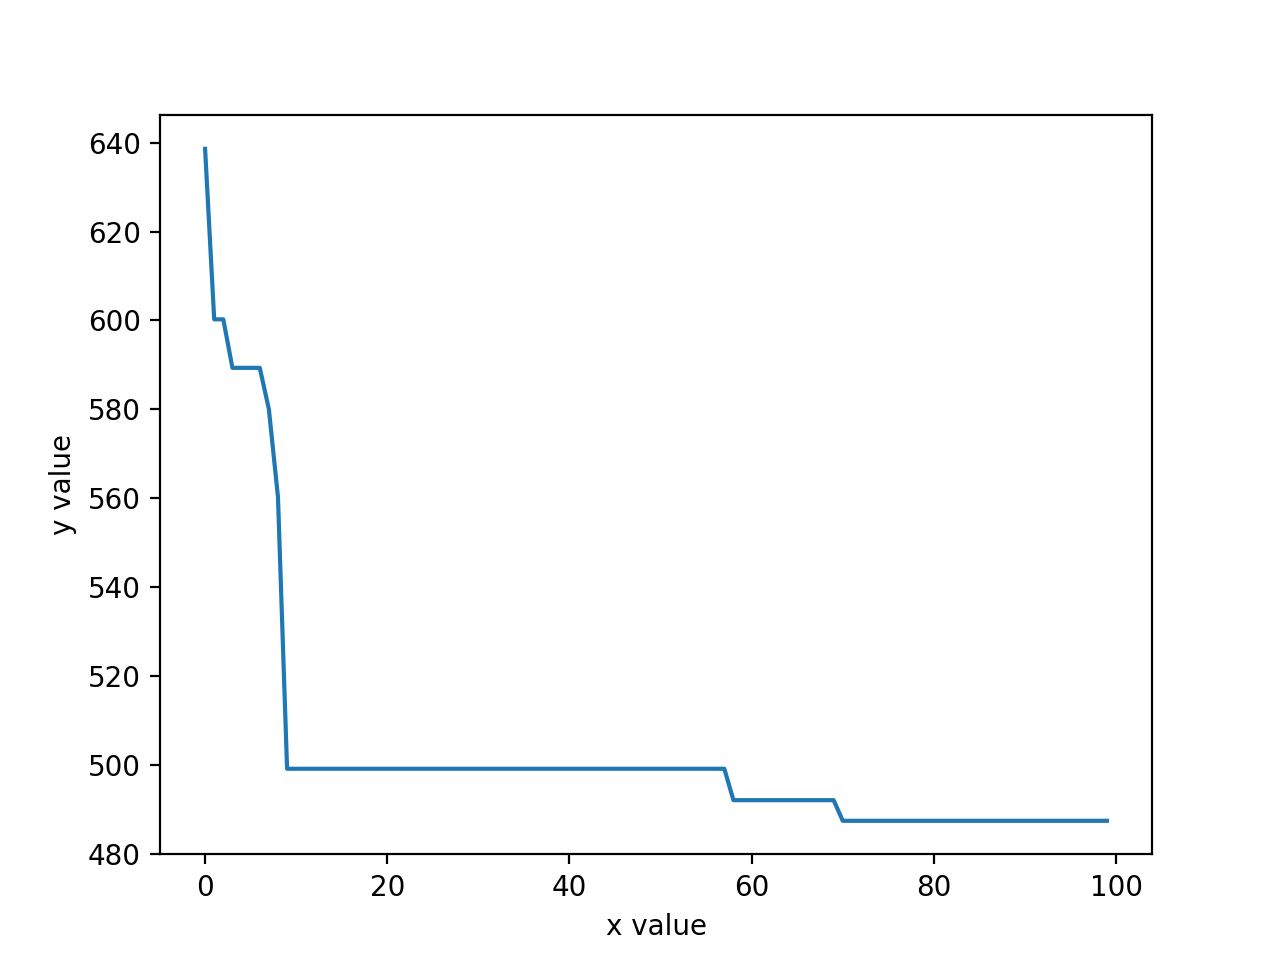


锦标赛法:
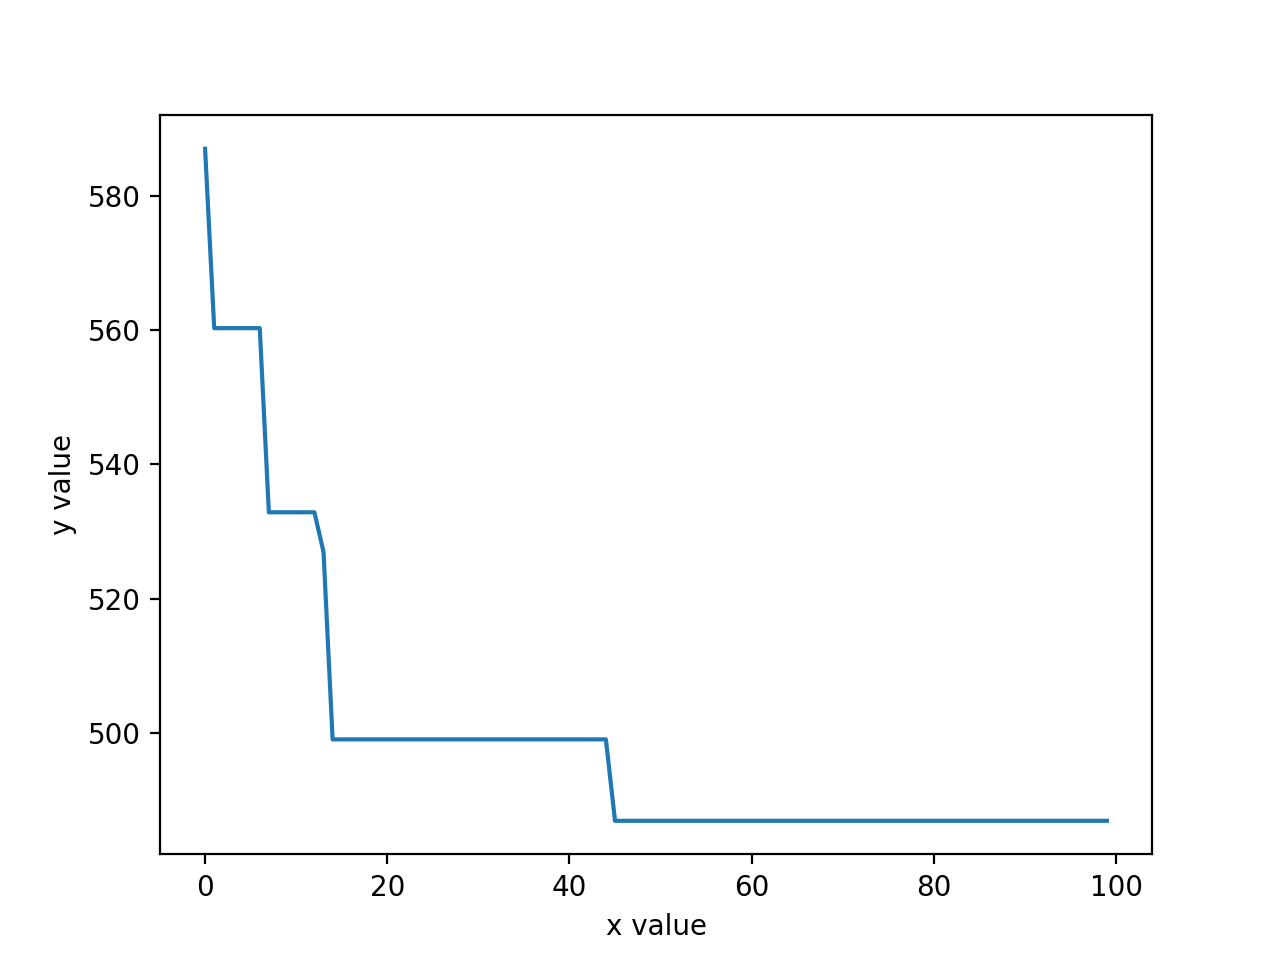


11 city:

轮盘赌法:
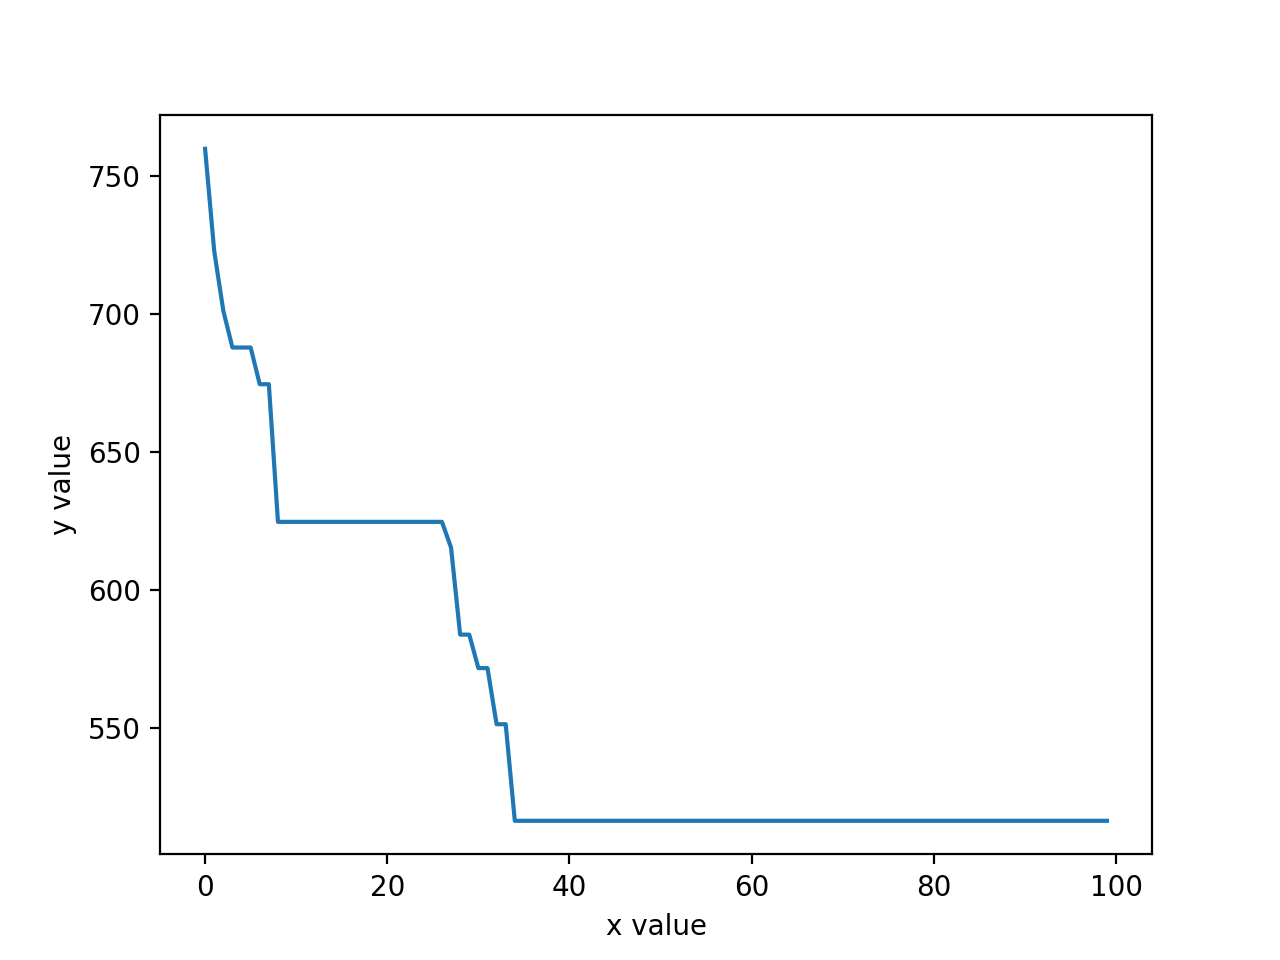

锦标赛法:
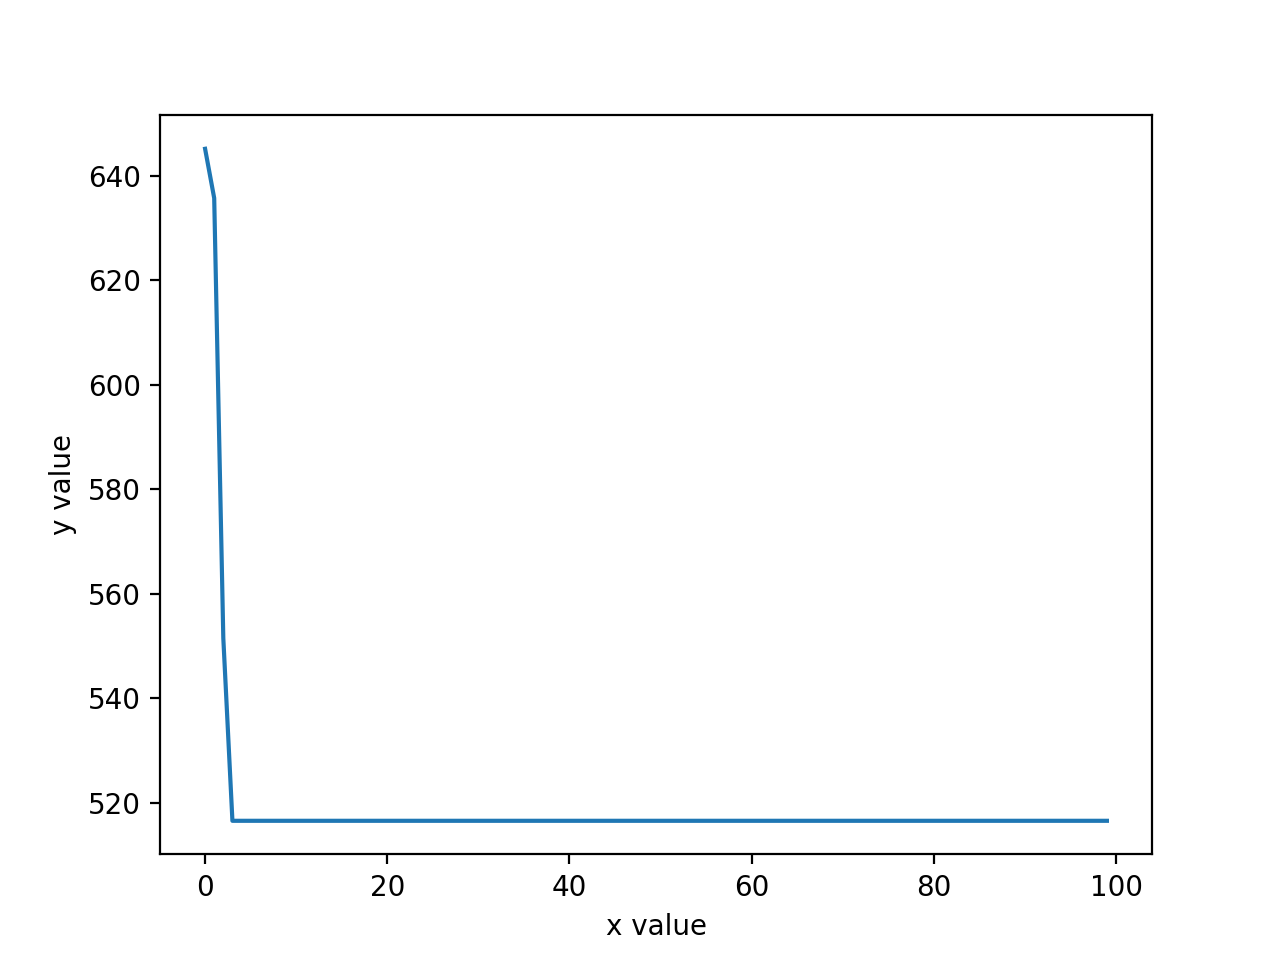

12 city

轮盘赌法:
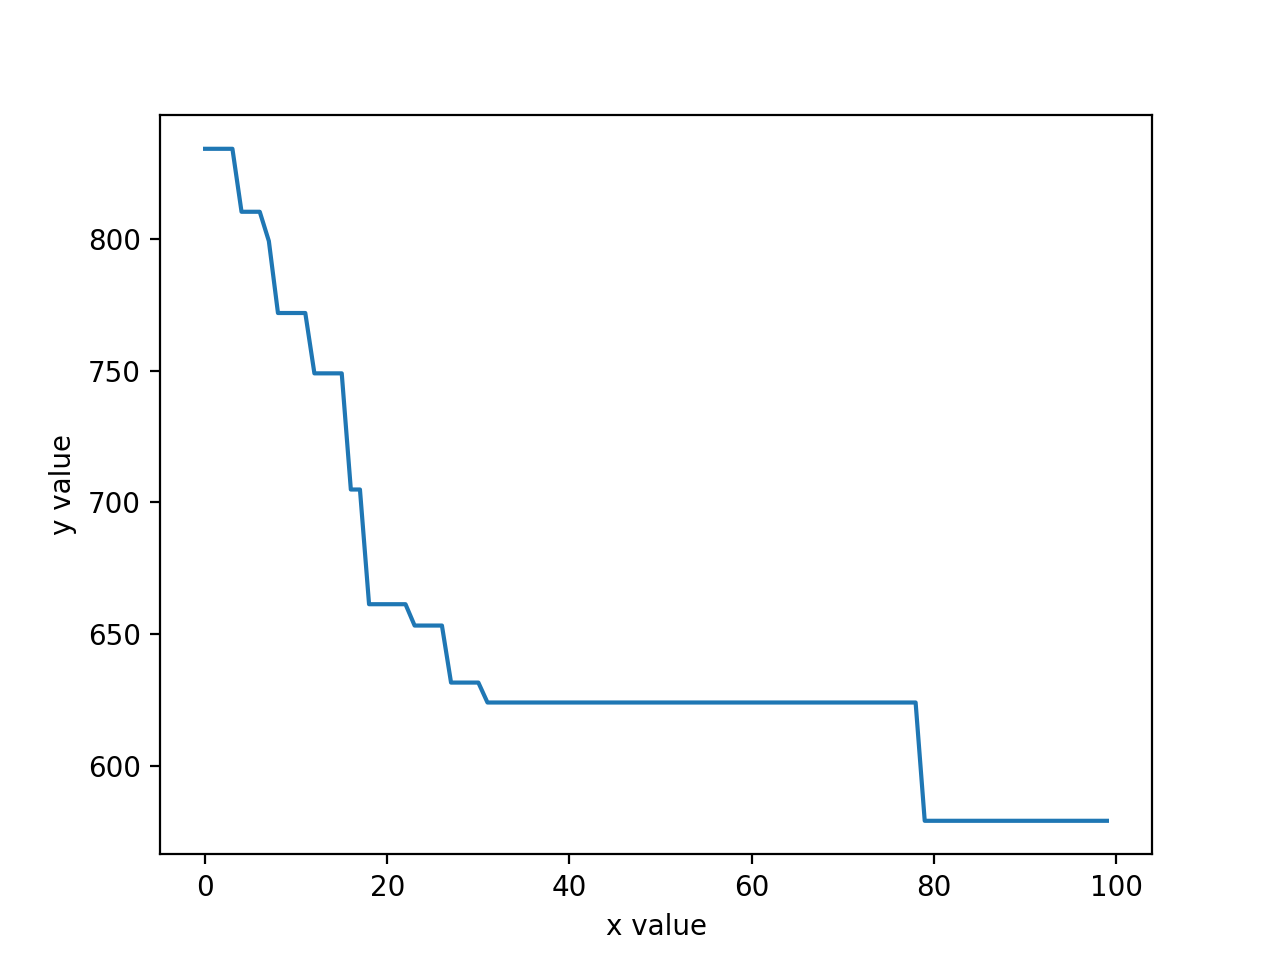

锦标赛法:
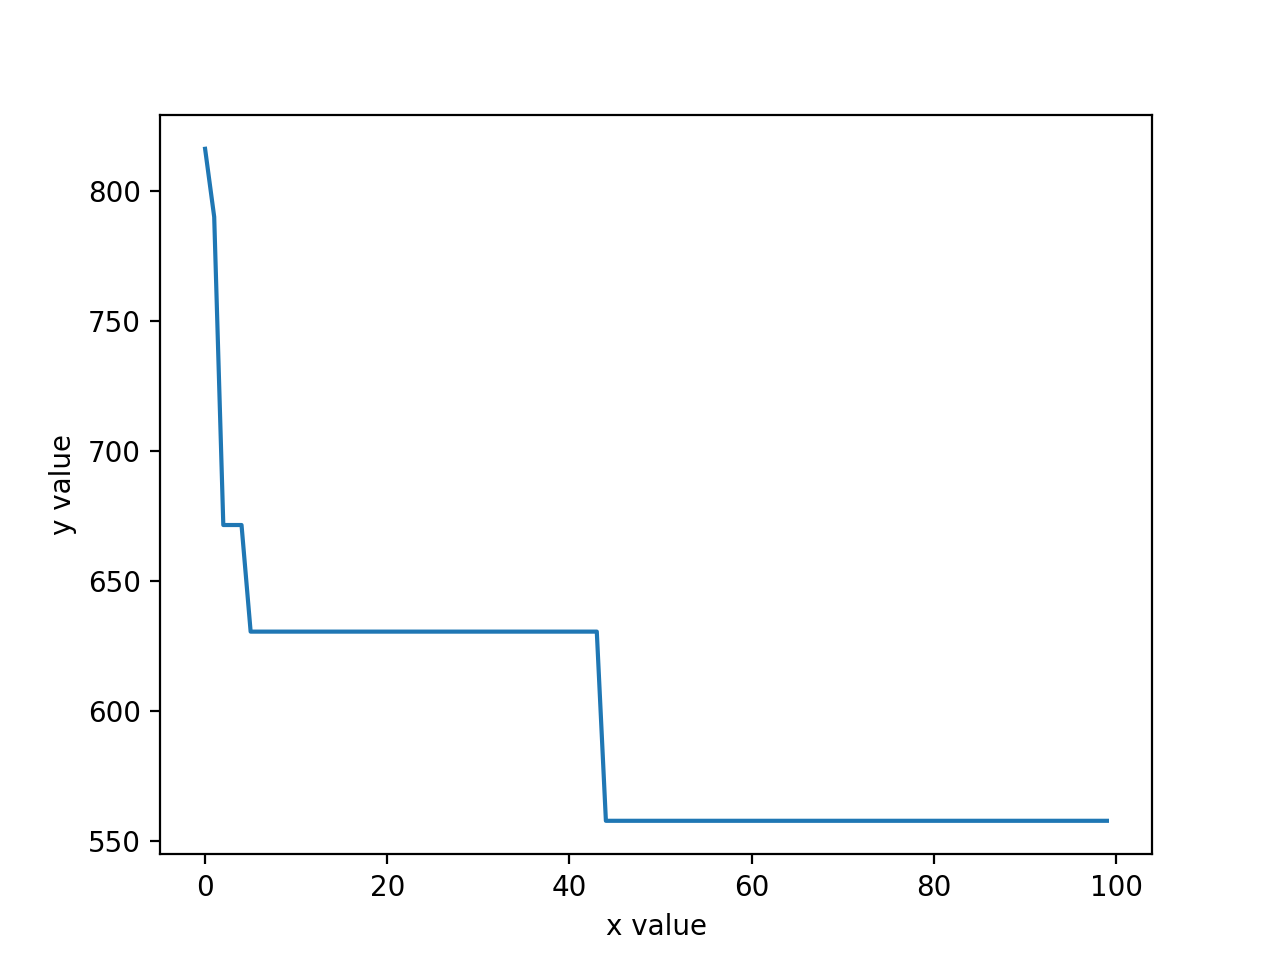

从本次简单的实验中，可以看书，两个选择策略均可以达到全局最优，但不同的是，相比轮盘赌法，锦标赛法的收敛速率更快。
所以通过本次试验，我们可以直观看出，对于小规模的问题，在都可以达到全局最优解的情况下，锦标赛法表现更好。

在相关论文[3]中， 作者得到的结果和本实验得到的结果相类似，并且做了一些扩展。总结如下:

当问题规模较小时，锦标赛法和轮盘赌法(proportional roulette wheel selection) 都可以达到全局最优解，但锦标赛法的收敛速度更快，表现更好。 并且锦标赛法可以不做任何预处理来解决最大或者最小化问题，而轮盘赌法是单向的。

如果问题规模增大，这两种选择法都容易陷入局部最优解，过早收敛。论文[3]中提出第三种方法: rank- based roulette wheel selections. 这种方法是之前讨论的轮盘赌法的变形。 它是根据每个个体适应度函数值的排名来进行选择。所以需要涉及排序。在排好序后，该方法会根据每个个体的排名计算被选择的概率，计算过程中会引入uniform scaling process。 该方法可以比较好的避免过早收敛和局部最优解，但收敛速度最慢，因为设计排序。

变异算子的比较

变异算子的简单分析:

变异可以在一定程度上减小搜索落入局部最优解的境地。变异可以以一定概率恢复之前损失掉的，比较‘好’的基因片段或者创造出一些之前未出现过的比较‘好’的基因片段。所以在一定程度上，变异算子可以维持种群基因的多样性，对全局搜索有一定的贡献。

本实验运用了两种变异算子，一个是反转变异(Reverse Sequence Mutation)，第二个是2-交换变异。反转变异的范围比较大，反转变异随机选取整个字串，2-交换变异只是在一个染色体（个体）中随机地选取两点进行交换。 从这一点上来讲，反转变异对于全局搜索的贡献更大，比2-交换变异在探索全局最优解上出色。

上述提到的轮盘赌法在使用2-交换变异算子的情况下，收敛速度较慢，在有些情况下，比如在某些限定的迭代次数中，甚至无法收敛到全局最优解。如果改用反转变异，收敛速度会相对快一点。  在论文[4]中，作者做的实验更具有概括性，所得出的结果与本实验相似，就是RSM变异是最有效的。

反转变异算子实现:

In [2]:
def RSM(self):
    for i in range(1, self.population.getPopSize()):
        if self.pro_mutation > random():
            m_tour = self.population.getTour(i)
            swap_index1 = 0
            swap_index2 = 0

            while swap_index1 == swap_index2:
                swap_index1 = randint(0, m_tour.getTourSize() - 1)
                swap_index2 = randint(0, m_tour.getTourSize() - 1)

            swap_index1 = min(swap_index1, swap_index2)
            swap_index2 = max(swap_index1, swap_index2)

            R = []
            R.extend(m_tour.tour[: swap_index1])
            R.extend(m_tour.tour[swap_index1: swap_index2 + 1][::-1])
            R.extend(m_tour.tour[swap_index2 + 1:])

            m_tour.tour = deepcopy(R)

2-交换变异算子的实现:

In [3]:
def mutation_roulette(self):
    for i in range(1, self.population.getPopSize()):
        if self.pro_mutation > random():
            m_tour = self.population.getTour(i)
            self.time_mutation += 1
            swap_index1 = 0
            swap_index2 = 0

            while swap_index1 == swap_index2:
                swap_index1 = randint(0, m_tour.getTourSize() - 1)
                swap_index2 = randint(0, m_tour.getTourSize() - 1)

            m_tour.tour[swap_index1], m_tour.tour[swap_index2] = m_tour.tour[swap_index2], m_tour.tour[swap_index1]

反转变异(RSM)
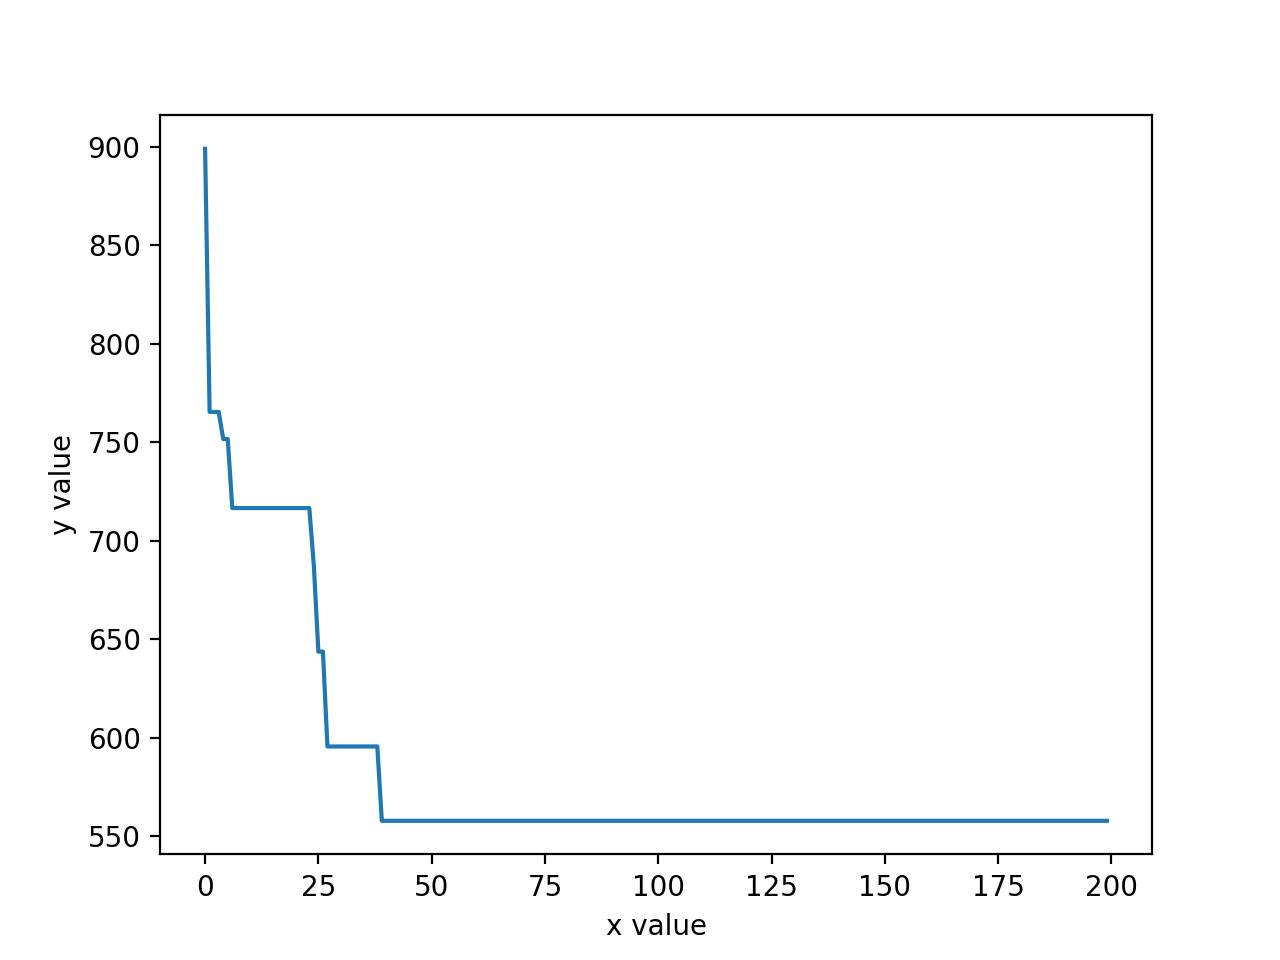

2-交换变异:
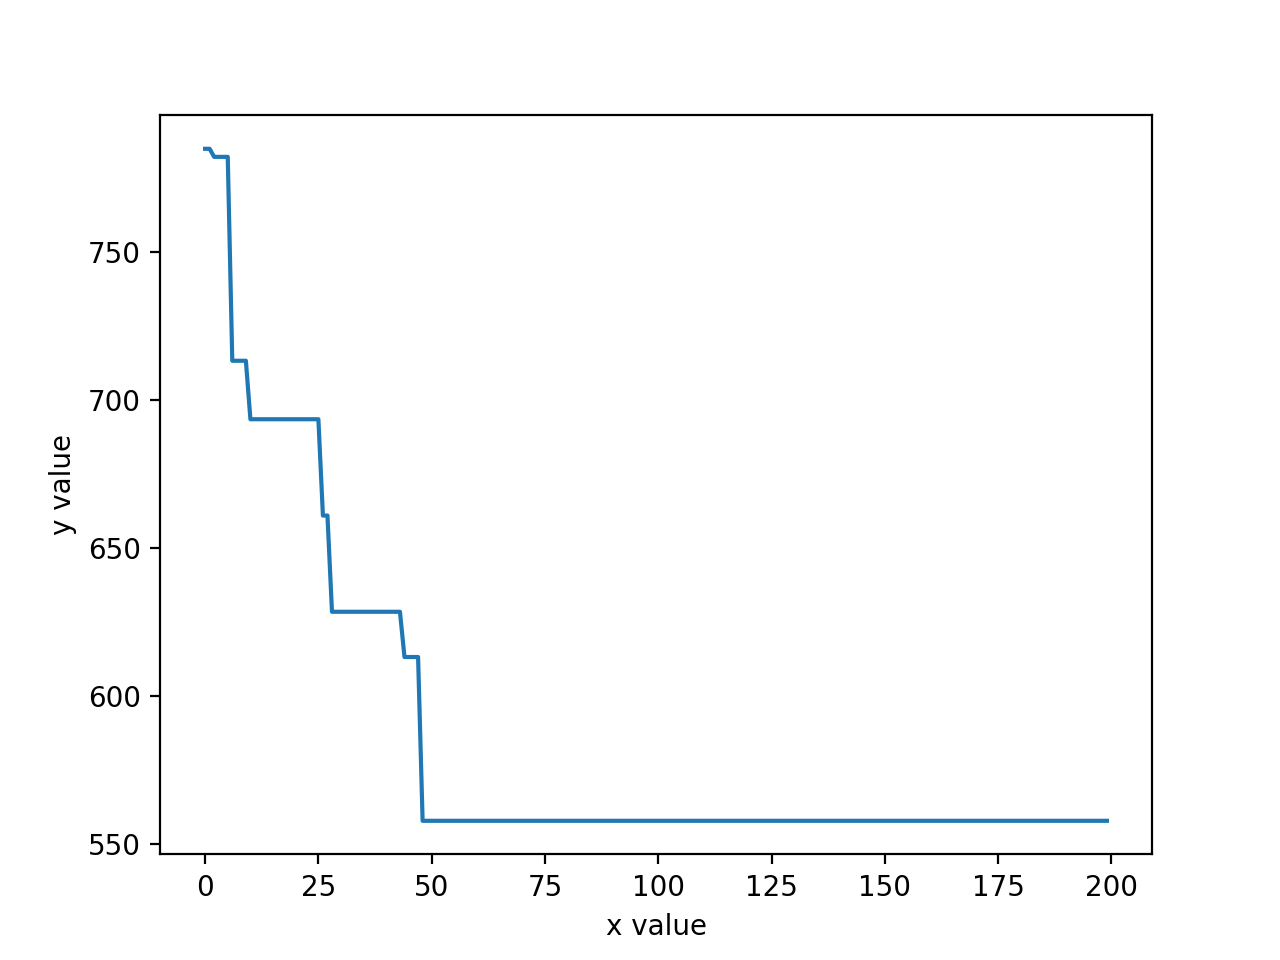

REFERENCES

[1] J. Zhong, X. Hu, M. Gu, J. Zhang, “Comparison of Performance
    between Different Selection Strategies on Simple Genetic Algorithms,” Proceeding of the       International Conference on Computational Intelligence for Modelling, Control and             automation, and International Conference of Intelligent Agents, Web Technologies and           Internet Commerce, 2005
    
    
[2] D.E. Goldberg and K. Deb, A comparative analysis of selection schemes used in genetic         algorithms, in: G.J.E. Rawlins (Ed.), Foundations of Genetic Algorithms, Morgan Kaufmann,     Los Altos, 1991, pp.69–93.


[3] N.M. Razali and J. Geraghty, Genetic Algorithm Performance with Different Selection           Strategies in Solving TSP. Proceedings of the World Congress on Engineering 2011 Vol II       WCE 2011, July 6 - 8, 2011, London, U.K.

[4] O. Abdoun, J. Abouchabaka, C. Tajan, Analyzing the Performance of Mutation Operators to       Solve the Travelling Salesman Problem. LaRIT Laboratory, Faculty of sciences, Ibn Tofail       University, Kenitra, Morocco